In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle

from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In [ ]:
path = '/content/gdrive/Shareddrives/STATS 170A Final Project/'

In [ ]:
df_features = pd.DataFrame()
with open(path+'datasets/Data_Frames/df_features.pkl','rb') as infile:
  df_features = pickle.load(infile)
df_features.head()

,sta01fips,White,Black,Am. Indian,Asian,Hispanic,Other,demo_sum,White%,Black%,Am. Indian%,Asian%,Hispanic%,Other%
0,0.0,56,6,0,4,0,12,78,0.717949,0.076923,0.000000,0.051282,0.000000,0.153846
1,1.0,67,178,0,0,0,1,246,0.272358,0.723577,0.000000,0.000000,0.000000,0.004065
2,2.0,28,0,1,0,0,0,29,0.965517,0.000000,0.034483,0.000000,0.000000,0.000000
3,4.0,201,11,8,1,4,54,279,0.720430,0.039427,0.028674,0.003584,0.014337,0.193548
4,5.0,317,102,17,1,0,0,437,0.725400,0.233410,0.038902,0.002288,0.000000,0.000000


In [ ]:
df_response = pd.DataFrame()
with open(path+'datasets/Data_Frames/df_response.pkl','rb') as infile:
  df_response = pickle.load(infile)
df_response.head()

,sta01fips,mean_inc01_2007,mean_inc01_2009,inc01_diff
0,0.0,27063.448108,24905.738869,-2157.709239
1,1.0,16552.915581,19696.374882,3143.459301
2,2.0,36060.155183,38347.017376,2286.862193
3,4.0,25486.059158,24613.345036,-872.714122
4,5.0,20406.178589,20987.013518,580.834929


# Merge with FEMA dataset

In [ ]:
df_fema_agg = pd.DataFrame()
with open(path+'datasets/Data_Frames/df_fema_agg.pkl','rb') as infile:
  df_fema_agg = pickle.load(infile)
df_fema_agg.head()

,STATEFIPS,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS
0,1,38.294731,44.0,0.057479,5.009167e+11,4.764241e+06,8.045670
1,2,42.113275,NaN,NaN,0.000000e+00,0.000000e+00,NaN
2,4,50.773880,1.0,0.010496,5.691977e+11,5.738128e+06,4.744808
3,5,41.826830,5.0,0.013329,2.897285e+11,2.904687e+06,3.467911
4,6,38.527041,0.0,0.010000,5.402843e+11,5.459482e+06,5.146705


In [ ]:
df_merge = pd.DataFrame()
with open(path+'datasets/Data_Frames/df_merge.pkl','rb') as infile:
  df_merge = pickle.load(infile)
df_merge.head()

,STATEFIPS,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS,White,Black,Am. Indian,Asian,Hispanic,Other,demo_sum,White%,Black%,Am. Indian%,Asian%,Hispanic%,Other%
0,1,38.294731,44.0,0.057479,5.009167e+11,4.764241e+06,8.045670,67,178,0,0,0,1,246,0.272358,0.723577,0.000000,0.000000,0.000000,0.004065
1,2,42.113275,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,28,0,1,0,0,0,29,0.965517,0.000000,0.034483,0.000000,0.000000,0.000000
2,4,50.773880,1.0,0.010496,5.691977e+11,5.738128e+06,4.744808,201,11,8,1,4,54,279,0.720430,0.039427,0.028674,0.003584,0.014337,0.193548
3,5,41.826830,5.0,0.013329,2.897285e+11,2.904687e+06,3.467911,317,102,17,1,0,0,437,0.725400,0.233410,0.038902,0.002288,0.000000,0.000000
4,6,38.527041,0.0,0.010000,5.402843e+11,5.459482e+06,5.146705,757,376,25,70,16,507,1751,0.432324,0.214734,0.014278,0.039977,0.009138,0.289549


# Plots

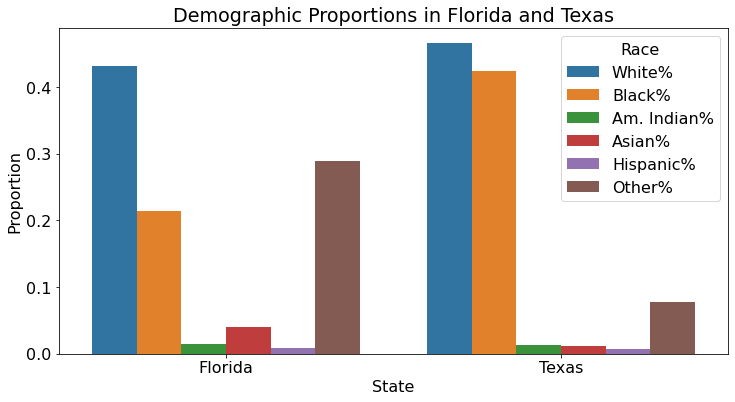

In [ ]:
plt.rcParams.update({'font.size': 16})

# Demographic proportions plot for California and Texas
# A piechart might be better
df_temp = df_features.loc[df_response['sta01fips'].isin([6.0, 48.0])]

df1 = df_temp.melt(id_vars="sta01fips", 
              value_vars=["White%","Black%","Am. Indian%","Asian%","Hispanic%","Other%"],
              var_name='Race', value_name='Percentage')

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='sta01fips', y='Percentage', hue='Race', ax=ax, data=df1)

# Label
plt.xlabel("State")
plt.ylabel("Proportion")
plt.title("Demographic Proportions in Florida and Texas")

ticklabs = [x.get_text() for x in ax.get_xticklabels()]
ticklabs[0] = 'Florida'
ticklabs[1] = 'Texas'
ax.set_xticklabels(ticklabs)

plt.show()

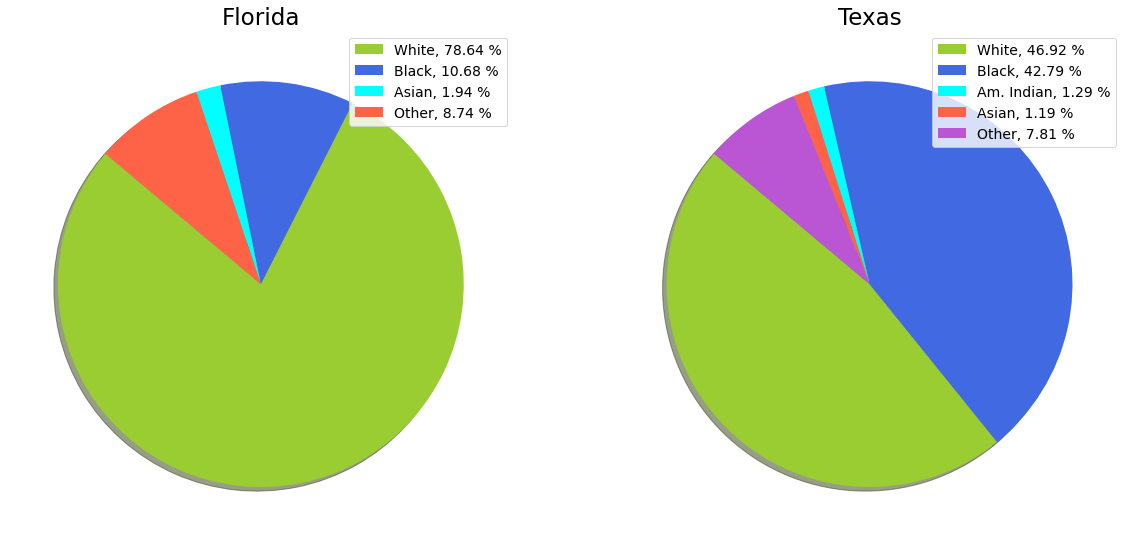

In [ ]:
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1, 2, figsize=(20,12))

df_temp2 = df_features.loc[df_response['sta01fips'].isin([9.0, 48.0])]
df_temp3 = df_temp2[["sta01fips","White","Black","Am. Indian","Asian","Hispanic","Other"]]

labels = ["Florida", "Texas"]

colors = ['yellowgreen', 'royalblue', 'aqua', 'tomato', 'mediumorchid']

for i, (idx, row) in enumerate(df_temp3.set_index('sta01fips').iterrows()):
    ax = axes[i]
    row = row[row.gt(row.sum() * .01)]
    ax.set_title(labels[i], size=23)

    p,t = ax.pie(row, startangle=140, colors=colors, shadow=True)
    ax.legend( loc = 'upper right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(row.index, (row/row.sum())*100)])

fig.subplots_adjust(wspace=.2)

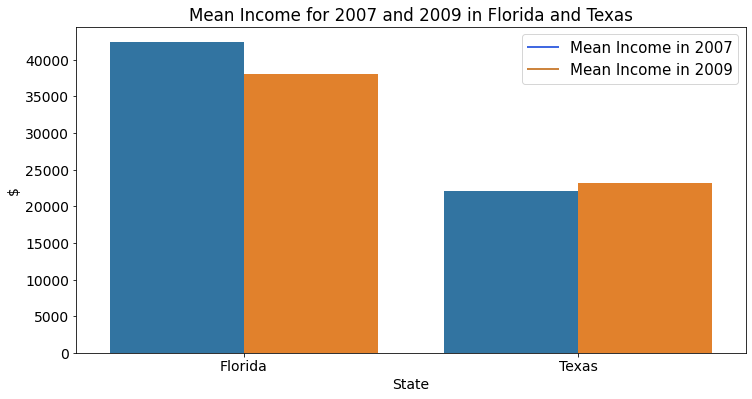

In [ ]:
# Income variables for California and Texas
df_temp = df_response.loc[df_response['sta01fips'].isin([9.0, 48.0])]

df2 = df_temp.melt(id_vars="sta01fips", 
              value_vars=["mean_inc01_2007","mean_inc01_2009"],
              var_name='Income', value_name='Dollars')


# Could remove income difference
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='sta01fips', y='Dollars', hue='Income', ax=ax, data=df2)

# Label
plt.xlabel("State")
plt.ylabel("$")
plt.title("Mean Income for 2007 and 2009 in Florida and Texas")

custom_lines = [Line2D([0], [0], color='royalblue', lw=2),
            Line2D([0], [0], color='peru', lw=2)]
plt.legend(custom_lines, ['Mean Income in 2007', 'Mean Income in 2009'], prop={'size': 15})

ticklabs = [x.get_text() for x in ax.get_xticklabels()]
ticklabs[0] = 'Florida'
ticklabs[1] = 'Texas'
ax.set_xticklabels(ticklabs)



plt.show()

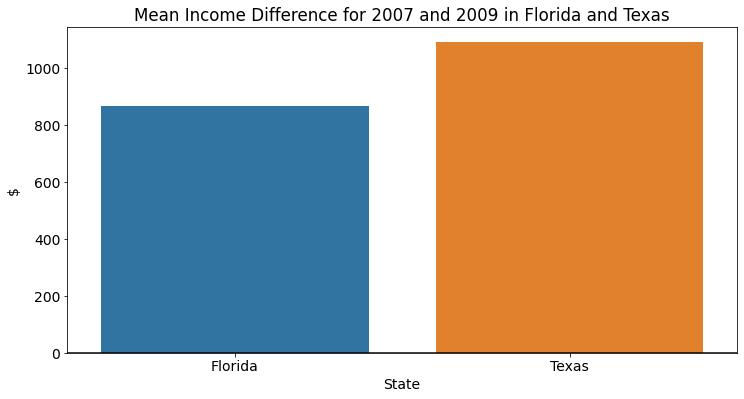

In [ ]:
# Difference in income between 2007 and 2009 for California and Texas
# Could add few more states around CA and TX
df_temp = df_response.loc[df_response['sta01fips'].isin([6.0, 48.0])]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='sta01fips', y='inc01_diff', ax=ax, data=df_temp)

ax.axhline(0, c='black', lw=1.5)

# Label
plt.xlabel("State")
plt.ylabel("$")
plt.title("Mean Income Difference for 2007 and 2009 in Florida and Texas")

ticklabs = [x.get_text() for x in ax.get_xticklabels()]
ticklabs[0] = 'Florida'
ticklabs[1] = 'Texas'
ax.set_xticklabels(ticklabs)


plt.show()

In [ ]:
df_fema_agg.fillna(0, inplace=True)
corr = df_fema_agg.iloc[:,1:6].corr()

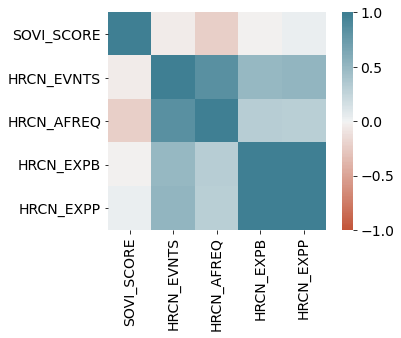

In [ ]:
plt.rcParams.update({'font.size': 14})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
df_fema_agg.fillna(0, inplace=True)
df_fema_agg.head()

,STATEFIPS,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS
0,1,38.294731,44.0,0.057479,5.009167e+11,4.764241e+06,8.045670
1,2,42.113275,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000
2,4,50.773880,1.0,0.010496,5.691977e+11,5.738128e+06,4.744808
3,5,41.826830,5.0,0.013329,2.897285e+11,2.904687e+06,3.467911
4,6,38.527041,0.0,0.010000,5.402843e+11,5.459482e+06,5.146705


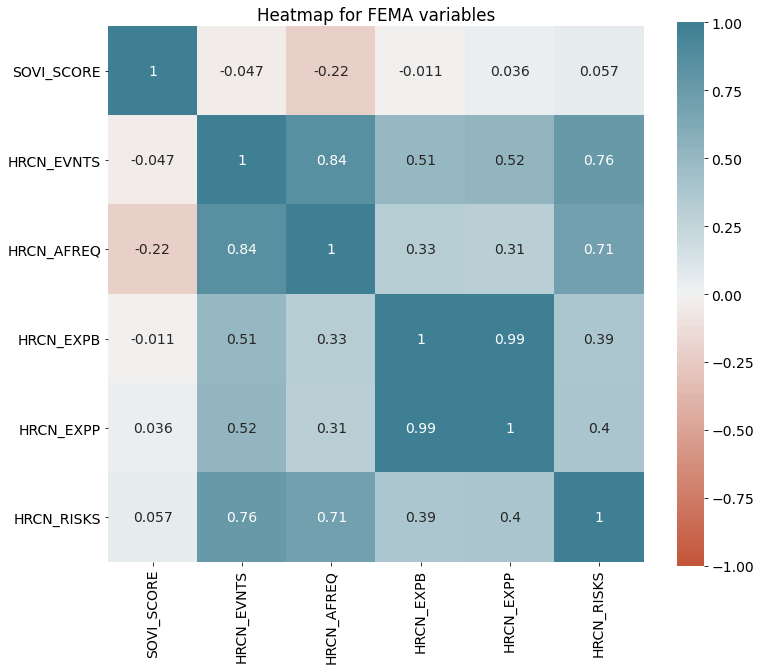

In [ ]:

corr = df_fema_agg.iloc[:,1:7].corr()
ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
plt.title("Heatmap for FEMA variables")
plt.show()

In [ ]:
temp = df_fema_agg.merge(df_response[['sta01fips','inc01_diff']],on='sta01fips')

KeyError: ignored

In [ ]:
g = sns.pairplot(temp.iloc[:,1:8])
g.fig.suptitle("Correlation Plots for FEMA Variables", y=1.05)
plt.show()

In [ ]:
df_fema_agg.rename(columns={'STATEFIPS':'sta01fips'},inplace=True)

In [ ]:
temp

NameError: ignored

# Plots for Report First Draft

## FEMA

In [ ]:
plt.rcParams.update({'font.size': 16})

In [ ]:
county = pd.read_csv('/content/gdrive/Shareddrives/STATS 170A Final Project/datasets/FEMA/NRI_Table_Counties.csv')

In [ ]:
vlist = ['STATEFIPS', 'STATE','COUNTYFIPS','COUNTY','SOVI_SCORE','HRCN_EVNTS','HRCN_AFREQ','HRCN_EXPB','HRCN_EXPP','HRCN_RISKS']

Example of FEMA County DataFrame

In [ ]:
county[vlist].dropna()

,STATEFIPS,STATE,COUNTYFIPS,COUNTY,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS
0,21,Kentucky,115,Johnson,34.450138,2.0,0.017975,1.924008e+09,23355.998223,1.877326
1,21,Kentucky,117,Kenton,30.508475,1.0,0.006514,1.877337e+10,159719.999264,2.119373
2,21,Kentucky,119,Knott,38.628301,1.0,0.009440,1.169517e+09,16339.254872,1.194618
3,21,Kentucky,121,Knox,43.634214,1.0,0.011968,2.106327e+09,31609.754510,1.872874
4,21,Kentucky,123,Larue,31.533307,1.0,0.011348,1.221343e+09,14192.999924,1.045807
...,...,...,...,...,...,...,...,...,...,...
3111,55,Wisconsin,127,Walworth,33.188806,1.0,0.005984,1.456473e+10,102187.638983,2.100136
3113,55,Wisconsin,131,Washington,21.009066,0.0,0.009231,1.752369e+10,131887.000000,1.532144
3114,55,Wisconsin,133,Waukesha,18.407568,1.0,0.005984,5.905012e+10,387357.770437,1.754646
3116,55,Wisconsin,137,Waushara,37.209302,0.0,0.010000,3.184594e+09,24496.000000,1.741531


In [ ]:
df_fema_county = county[vlist].dropna()
with open(path+'/datasets/Data_Frames/df_fema_county.pkl','wb') as outfile:
    pickle.dump(df_fema_county, outfile)

In [ ]:
df_fema_county[df_fema_county['STATEFIPS']==12].head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTY,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS
1387,12,Florida,1,Alachua,34.647221,36.0,0.202830,3.122437e+10,247077.264098,7.941039
1388,12,Florida,3,Baker,26.369728,29.0,0.171435,1.813565e+09,27089.953807,2.272096
1389,12,Florida,5,Bay,39.613717,42.0,0.239213,2.176289e+10,168659.326333,17.243601
1390,12,Florida,7,Bradford,33.977138,25.0,0.189359,2.088433e+09,28517.650617,3.180841
1391,12,Florida,9,Brevard,42.727631,43.0,0.228624,6.821250e+10,541971.331889,51.441200


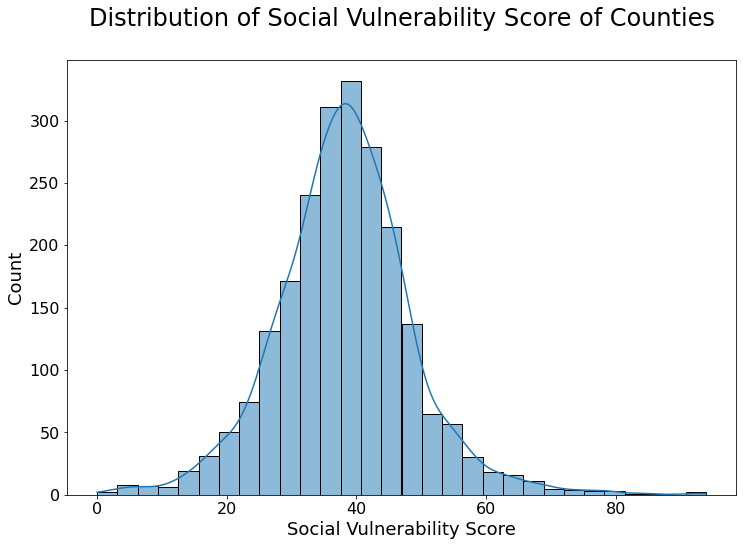

In [ ]:
ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(data = df_fema_county, x='SOVI_SCORE', bins=30, kde=True)
plt.xlabel("Social Vulnerability Score", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Distribution of Social Vulnerability Score of Counties\n", fontsize=24)
plt.show()

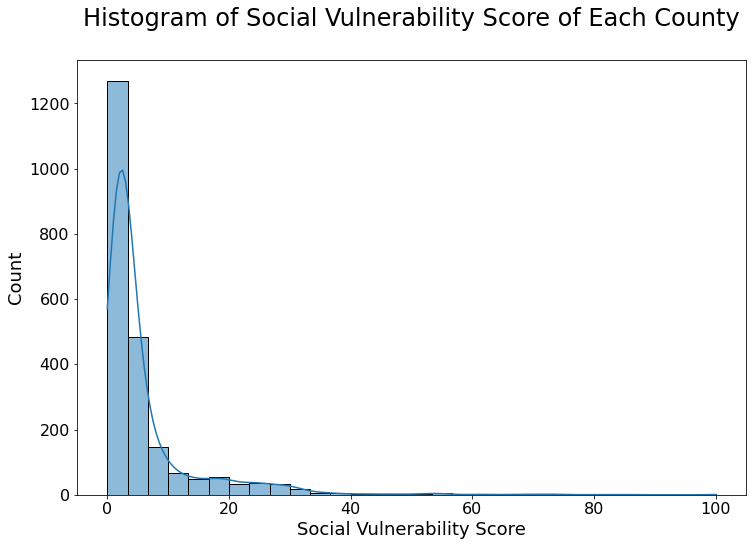

In [ ]:
ax = plt.subplots(figsize=(12,8))
ax = sns.histplot(data = df_fema_county, x='HRCN_RISKS', bins=30, kde=True)
plt.xlabel("Social Vulnerability Score", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("Histogram of Social Vulnerability Score of Each County\n", fontsize=24)
plt.show()

In [ ]:
df_fema_county.rename(columns={'STATEFIPS': 'State Code', 'STATE':'State', 'COUNTY':'County', 'COUNTYFIPS': 'County Code','SOVI_SCORE':'Social Vul. Score','HRCN_EVNTS':'Hrcn Events',
                               'HRCN_AFREQ':'Hrcn Annual Freq.','HRCN_EXPB':'Hrcn Exp.Building',
                               'HRCN_EXPP':'Hrcn Exp.Popul.','HRCN_RISKS':'Hrcn Risk Score'}, inplace=True)

In [ ]:
df_fema_name = df_fema_county.rename(columns={'SOVI_SCORE':'Social Vulnerability Score','HRCN_EVNTS':'Hurricane Events',
                               'HRCN_AFREQ':'Hurricane Annualized Frequency','HRCN_EXPB':'Hurricane Exposure-Building',
                               'HRCN_EXPP':'Hurricane Exposure-Population','HRCN_RISKS':'Hurricane Risk Score'})

In [ ]:
with open(path+'/datasets/Data_Frames/df_fema_name.pkl','wb') as outfile:
    pickle.dump(df_fema_name, outfile)

In [ ]:
df_fema_county[df_fema_county['STATEFIPS']==12].head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTY,SOVI_SCORE,HRCN_EVNTS,HRCN_AFREQ,HRCN_EXPB,HRCN_EXPP,HRCN_RISKS
1387,12,Florida,1,Alachua,34.647221,36.0,0.202830,3.122437e+10,247077.264098,7.941039
1388,12,Florida,3,Baker,26.369728,29.0,0.171435,1.813565e+09,27089.953807,2.272096
1389,12,Florida,5,Bay,39.613717,42.0,0.239213,2.176289e+10,168659.326333,17.243601
1390,12,Florida,7,Bradford,33.977138,25.0,0.189359,2.088433e+09,28517.650617,3.180841
1391,12,Florida,9,Brevard,42.727631,43.0,0.228624,6.821250e+10,541971.331889,51.441200


In [ ]:
renamed = df_fema_county.rename(columns={'STATEFIPS': 'State Code', 'STATE':'State', 'COUNTY':'County', 'COUNTYFIPS': 'County Code','SOVI_SCORE':'Social Vulnerability Score','HRCN_EVNTS':'Hurcn Events',
                               'HRCN_AFREQ':'Hurcn Annualized Frequency','HRCN_EXPB':'Hurcn Exposure-Building',
                               'HRCN_EXPP':'Hurcn Exposure-Population','HRCN_RISKS':'Hurcn Risk Score'})

renamed[renamed["State Code"] == 48].head(10)

,State Code,State,County Code,County,Social Vulnerability Score,Hurcn Events,Hurcn Annualized Frequency,Hurcn Exposure-Building,Hurcn Exposure-Population,Hurcn Risk Score
2523,48,Texas,1,Anderson,22.782814,3.0,0.018622,4.306318e+09,58025.693211,2.045053
2524,48,Texas,3,Andrews,29.838392,1.0,0.007825,1.301198e+09,14782.007733,1.250692
2525,48,Texas,5,Angelina,43.791880,10.0,0.046403,7.462149e+09,86573.487432,5.757990
2526,48,Texas,7,Aransas,51.951123,23.0,0.134900,3.098330e+09,23145.231827,8.289692
2527,48,Texas,9,Archer,26.054395,0.0,0.010000,9.998650e+08,9054.000000,0.746745
2529,48,Texas,13,Atascosa,44.028380,8.0,0.036334,3.248230e+09,44761.951362,5.456557
2530,48,Texas,15,Austin,32.597556,13.0,0.088014,3.075798e+09,28373.660672,17.694333
2531,48,Texas,17,Bailey,51.990540,0.0,0.000000,0.000000e+00,0.000000,0.000000
2532,48,Texas,19,Bandera,39.692550,4.0,0.021711,2.139037e+09,20439.224872,6.691056
2533,48,Texas,21,Bastrop,30.547891,3.0,0.019096,6.262200e+09,74169.923574,8.266356


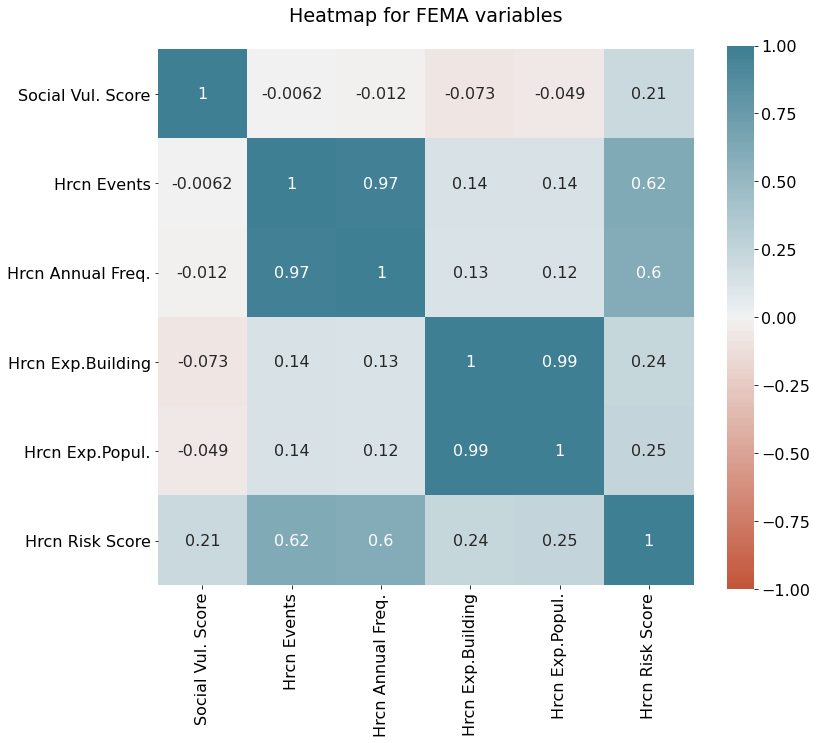

In [ ]:
corr = df_fema_county.iloc[:,4:].corr()
ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
plt.title("Heatmap for FEMA variables\n")
plt.show()

,State Code,State,County Code,County,Social Vul. Score,Hrcn Events,Hrcn Annual Freq.,Hrcn Exp.Building,Hrcn Exp.Popul.,Hrcn Risk Score
0,21,Kentucky,115,Johnson,34.450138,2.0,0.017975,1.924008e+09,23355.998223,1.877326
1,21,Kentucky,117,Kenton,30.508475,1.0,0.006514,1.877337e+10,159719.999264,2.119373
2,21,Kentucky,119,Knott,38.628301,1.0,0.009440,1.169517e+09,16339.254872,1.194618
3,21,Kentucky,121,Knox,43.634214,1.0,0.011968,2.106327e+09,31609.754510,1.872874
4,21,Kentucky,123,Larue,31.533307,1.0,0.011348,1.221343e+09,14192.999924,1.045807
